# Credit Card Fraud Detection Project

> By Eng. Ramy Gendy

<a id='Intro'></a>

## Introduction

> Credit card fraud detection (CCFD) is a challenging problem, which requires analyzing large volumes of transaction data to identify fraud patterns. It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

> **Goal:** Learning efficient and accurate ML models for detecting frauds in massive streams of transactions as an early warning system by using `Python 3.8` on `Google Colab` to detect whether a transaction is a normal payment or a fraud.

> Project will tackle:
  * Outlier Analysis (Identify Rare data).
  * Dealing with imblanced & skewed class distributions.
  * Detect Fraud Patterns with ML Models:
    * DecisionTree.
    * Random Forest.
    * Xgboost.
    * Logistic Regression.
    * Svm.
    * KNN.
  * ML metrics for model validation.
  * Precision-Recall tradeoff.


## Table of Contents:
 * <a href="#Introduction">Introduction.</a>
 * <a href="#Investigation Overview">Investigation Overview & Problem Verification.</a>
 * <a href="#Dataset Overview & Domain Knowledge">Dataset Overview & Domain Knowledge.</a>
 * Data Preparation.
 * <a href="#Data Preprocessing">Data Preprocessing:</a>
  * Handle Missing Data.
  * Handle duplicated Data.
  * Handle rara data(Outliers).
 * <a href="#Data Visualization">Data Visualization</a>
  * Univariante Analysis.
  * Bivariante Analysis.
  * Multivariante Analysis.
  * Questions Answers.
 * Feature Engineering:
  * Feature Dimentionality Reduction.
  * Feature Selection (Domain knowledge features).
  * Feature Extraction.
 * Model Selection
 * Fitting Data
 * Train
 * Test 
 * <a href="#Conclusion">Conclusion & Documentation</a>
 * Integration & Deployment
 * Monitor
 * Maintenance & Future Considerations
 * <a href="#References">References</a>

<a id='Investigation Overview'></a>
## Investigation Overview

> **`Credit Card Dataset`** Dataset includes:
  * Imbalanced data distributions.
  * Fraudrent Patterns.
  * PCA transformation.
  * Rare data.





<a id='#Dataset Overview & Domain Knowledge'></a>
## Dataset Overview & Domain Knowledge

> Investigation Overview:
* The dataset contains transactions made by credit cards in September 2013 by European cardholders.
* Due to confidentiality issues, the original features and more background information about the data are not available. 
* This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
* It contains only numerical input variables which are the result of a PCA transformation.

> Starting by:
 * Installing required packages.
 * Importing our Libraries.
 * Importing our dataset from source(Kaggle).
 * Setting Notebook Configurations.
 * Loading and exploring our dataset and find answers to our  **Questions:**
    01. <a href="#01"> ?</a>
    02. <a href="#02"> ?</a>
    03. <a href="#03"> ?</a>
    04. <a href="#04"> ?</a>
    05. <a href="#05"> ?</a>
 * Data wrangling & preprocessing



### Installing Packages

### Kaggle Package

> * Will be using Kaggle API to call dataset.
* **_you can skip this part if you already using local machine or uploaded the dataset manually._**

In [44]:
# Install Kaggle Package
# we add ` &> /dev/null ` to silence its output outside of any errors that may arise. 
#!pip install kaggle &> /dev/null

In [45]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [46]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "ramygendy" # "Your_Username"
kaggle_key = "7295558003127d67ed7f47ebbb72c103" # "you_Kaggle_API_Token"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Importing Librares

> Importing required libraries, config. warnings and display settings.

In [47]:
# Importing libraries
# numpy library use to do array operations and also to do calculations
import numpy as np
# pandas library use to load dataset and also manipulate tabular data
import pandas as pd
# matplot library use to plot different graphs
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize
from matplotlib import rcParams

# seaborn library use to plot different plots
import seaborn as sns

In [48]:
# Ignore matched warnings and never print them
import warnings
warnings.filterwarnings('ignore')

In [49]:
# Set display format
rcParams['figure.figsize'] = 12,5
colors = ["#0101DF", "#DF0101"]
#  Aprox. for float numbers to the neareast 2 decimal points
#pd.options.display.float_format = "{:,.2f}".format
# Settings the display
#pd.set_option("display.max_columns", None)
#pd.set_option('display.max_colwidth', None)
#pd.set_option('display.max_rows', None)

### Importing Dataset

> Dataset can be downloaded directly from [kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/download?datasetVersionNumber=3) or Call it directly from Kaggle API

In [50]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle datasets download -d mlg-ulb/creditcardfraud

creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)


In [51]:
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o creditcardfraud.zip

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


### Loading & Explorating Dataset

> Reading using `Pandas` dataframe and exploring & displaying it using `head()` or `tail()`, explore data using statistical summery `describe()`, information summery `info()`, check unique values `unique()` and count them`value_counts()`

In [52]:
# Read dataset
df = pd.read_csv('creditcard.csv')

In [53]:
# View dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [54]:
# Dataframe shape
df.shape

(284807, 31)

In [55]:
# Columns name
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [56]:
# Information summery
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [57]:
# Statistical summery
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


> Understanding:
 1. Features `V1, V2, … V28` are the principal components obtained with PCA, the only features which have not been transformed with PCA are `Time` and `Amount`.
 2. Feature `Time` contains the seconds elapsed between each transaction and the first transaction in the dataset.
 3. The feature `Amount` is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning.
 4. Feature `Class` is the our target variable and it takes value `1` in case of fraud and `0` otherwise.

### Data Wrangling & Preprocessing

1. Data Cleansing:
  * Check missing values.
  * Check duplicated values.

In [58]:
# Check missing values
df.isnull().sum().max()

0

In [59]:
# Check duplicates
df.duplicated().sum()

1081

In [60]:
# check if duplicated values relation with our target
ddf=df[df.duplicated()]
ddf.shape

(1081, 31)

In [61]:
# Total number of duplicated values for our Fraud transaction in Target 'Class'
ddfsum = ddf[ddf["Class"]==1]['Class'].sum()
# 10% of total size of Fraud pool
totten= len(df[df['Class']==1])*0.1
# check if duplicated valies is more than total size of Fraud transaction in the Target:
if ddfsum < totten:
  print ("Duplicated values in Fraud {} is less than 10% of {} total values".format(ddfsum,totten))
  print ("Removel of duplication is accepted")
else:
  print ("Duplicated values in Fraud {} is more than 10% of {} total  values".format(ddfsum,totten))
  print ("Removel of duplication is not accepted")

Duplicated values in Fraud 19 is less than 10% of 49.2 total values
Removel of duplication is accepted


In [62]:
# display original and duplicated rows
df[df.duplicated(keep=False)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
32,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
34,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
112,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284190,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0
284192,172233.0,-2.691642,3.123168,-3.339407,1.017018,-0.293095,-0.167054,-0.745886,2.325616,-1.634651,...,0.402639,0.259746,-0.086606,-0.097597,0.083693,-0.453584,-1.205466,-0.213020,36.74,0


In [63]:
# drop duplicated values and reset index
df.drop_duplicates(inplace=True, ignore_index=True)

In [64]:
# Check duplicated rows
df.loc[df.duplicated(),:]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


* Dividing dataframe into dependent(target) & independent (features) values.

In [65]:
# Dependent Variables
x = df.iloc[:, -1].values

In [66]:
# Independent Variables
y = df.iloc[:, :-1].values

### Data Visualization

#### Univariate Analysis

In [24]:
# Ratio of fraud '1' and non fraud '0' cases compare to the whole dataset
df['Class'].value_counts()/len(df.index)

0    0.998333
1    0.001667
Name: Class, dtype: float64

Text(0.5, 1.0, 'Class Distributions (0: Not Fraud || 1: Fraud)')

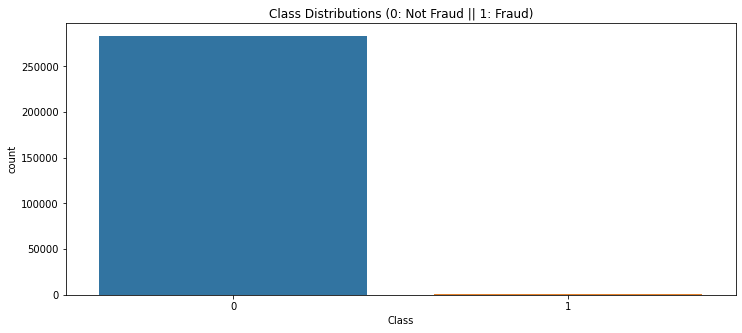

In [25]:
# Plot target distribution
sns.countplot('Class', data=df)
plt.title('Class Distributions (0: Not Fraud || 1: Fraud)', fontsize=12)

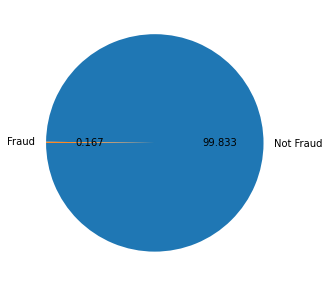

In [26]:
plt.pie(df.Class.value_counts(),labels=['Not Fraud','Fraud'],startangle=180,autopct='%.3f');



**Distributions:** it's clear now dataset is highly unbalanced with skewed features.


#### Bivariante Analysis
* Between *Target* variable and *Features*.

In [27]:
# Time statistical summary across fraud and not fraud transactions.
print ("Fraud")
print (df.Time[df.Class == 1].describe())
print ()
print ("Not Fraud")
print (df.Time[df.Class == 0].describe())

Fraud
count       473.000000
mean      80450.513742
std       48636.179973
min         406.000000
25%       41203.000000
50%       73408.000000
75%      129095.000000
max      170348.000000
Name: Time, dtype: float64

Not Fraud
count    283253.000000
mean      94835.058093
std       47475.550607
min           0.000000
25%       54233.000000
50%       84711.000000
75%      139308.000000
max      172792.000000
Name: Time, dtype: float64


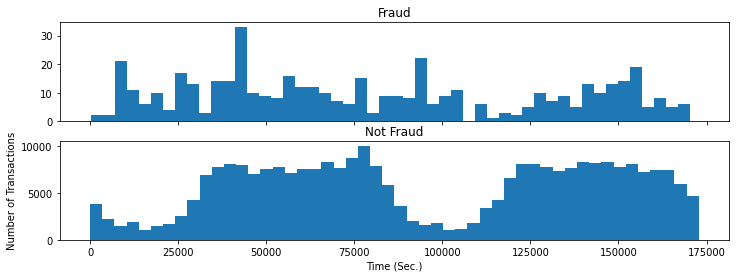

In [28]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
bins = 50

ax1.hist(df.Time[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('Not Fraud')

plt.xlabel('Time (Sec.)')
plt.ylabel('Number of Transactions')
plt.show()

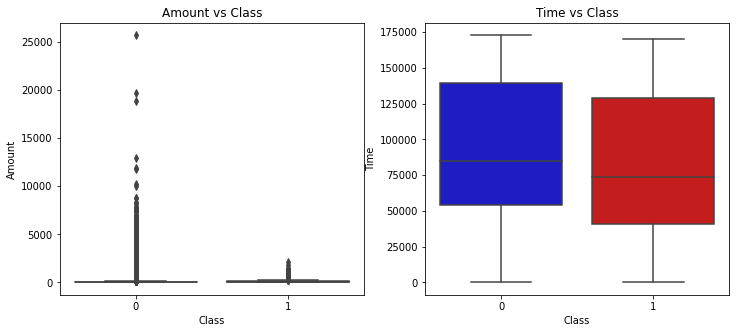

In [29]:
f, axes = plt.subplots(ncols=2)

sns.boxplot(x="Class", y="Amount", data=df, palette=colors, ax=axes[0],showfliers=True)
axes[0].set_title('Amount vs Class')

sns.boxplot(x="Class", y="Time", data=df, palette=colors, ax=axes[1],showfliers=True)
axes[1].set_title('Time vs Class')

plt.show()

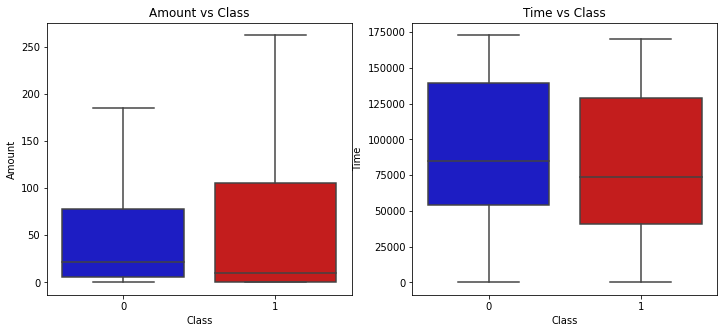

In [30]:
f, axes = plt.subplots(ncols=2)

sns.boxplot(x="Class", y="Amount", data=df, palette=colors, ax=axes[0],showfliers=False)
axes[0].set_title('Amount vs Class')

sns.boxplot(x="Class", y="Time", data=df, palette=colors, ax=axes[1],showfliers=False)
axes[1].set_title('Time vs Class')

plt.show()

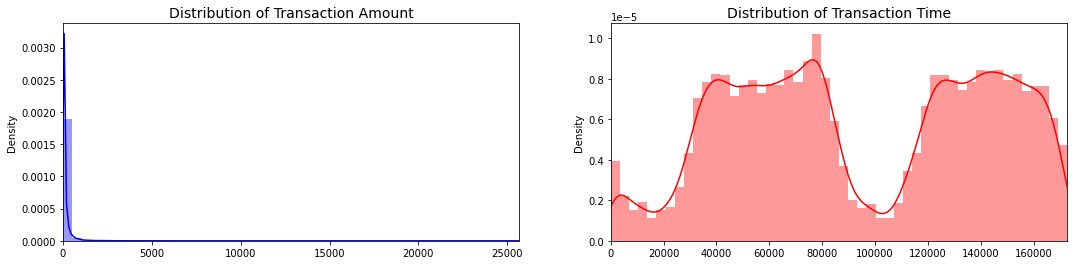

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='b')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='r')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

**Conclusion**
> The non-fraudrent transaction have a larger mean value, larger `Q1`, smaller `Q3` and `Q4` and larger outliers; fraudulent transactions have a smaller `Q1` and mean, larger `Q4` and smaller outliers.

#### Multivariante Analysis

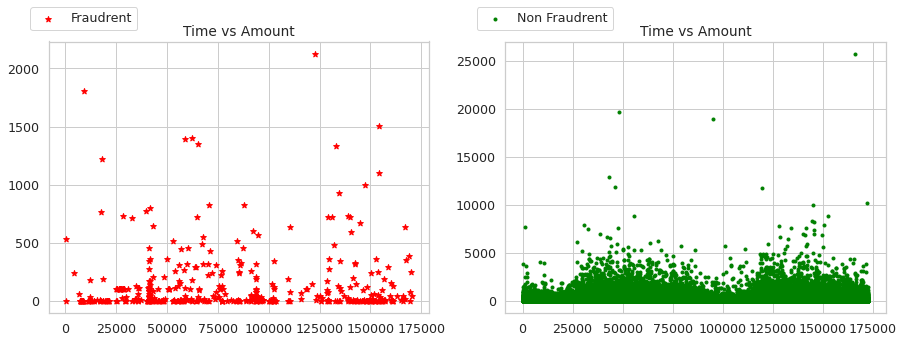

In [121]:
# plot relation with different scale
df1=df[df['Class']==1]
df2=df[df['Class']==0]
fig, ax = plt.subplots(1,2, figsize=(15, 5))

ax[0].scatter(df1['Time'],df1['Amount'],color='red', marker= '*', label='Fraudrent')
ax[0].set_title('Time vs Amount')
ax[0].legend(bbox_to_anchor =(0.25, 1.15))

ax[1].scatter(df2['Time'],df2['Amount'],color='green', marker= '.', label='Non Fraudrent')
ax[1].set_title('Time vs Amount')
ax[1].legend(bbox_to_anchor =(0.3, 1.15))

plt.show();

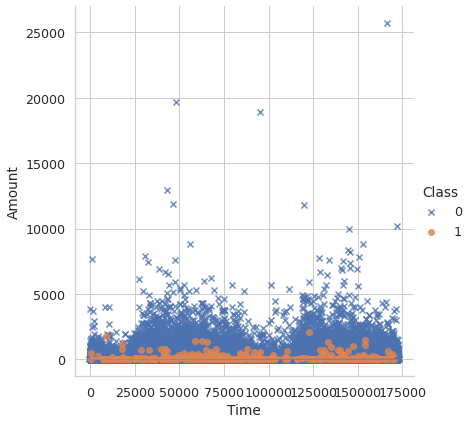

In [81]:
sns.lmplot(x='Time', y='Amount', hue='Class', markers=['x', 'o'], data=df, height=6);

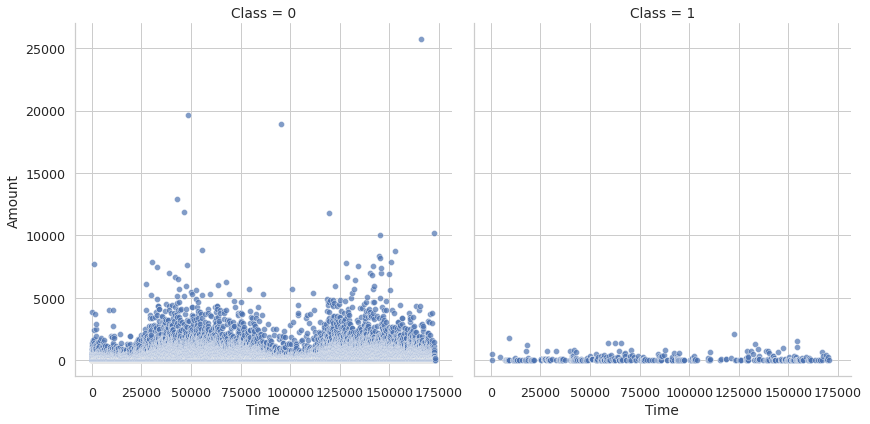

In [120]:
# plot relation in same scale
g = sns.FacetGrid(df, col="Class", height=6)
g.map(sns.scatterplot, "Time", "Amount", alpha=.7)
g.add_legend();

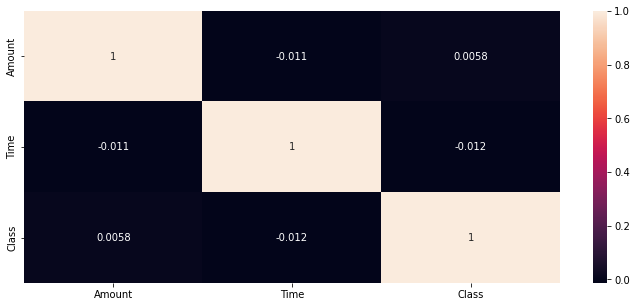

In [32]:
sns.heatmap(
    df.loc[:, ['Amount', 'Time', 'Class']].corr(),
    annot=True
);

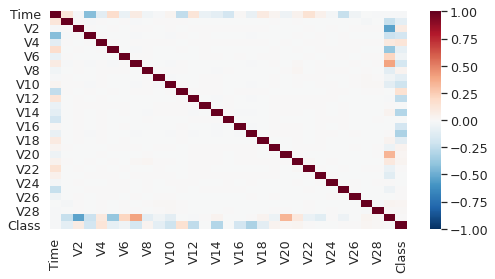

In [33]:
sns.set(font_scale=1.15)
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(), cmap='RdBu_r', vmin=-1, vmax=1);



> There is no notable correlation between features `V1 ~ V28`. There are certain correlations between some of these features and `Time` (inverse correlation with `V3`) and `Amount` (direct correlation with `V7` and `V20`, inverse correlation with `V1` and `V5`).

> Let's plot the correlated and inverse correlated values on the same graph. starting with the direct correlated values: `V20` & `Amount` and `V7` & `Amount`.


<Figure size 864x360 with 0 Axes>

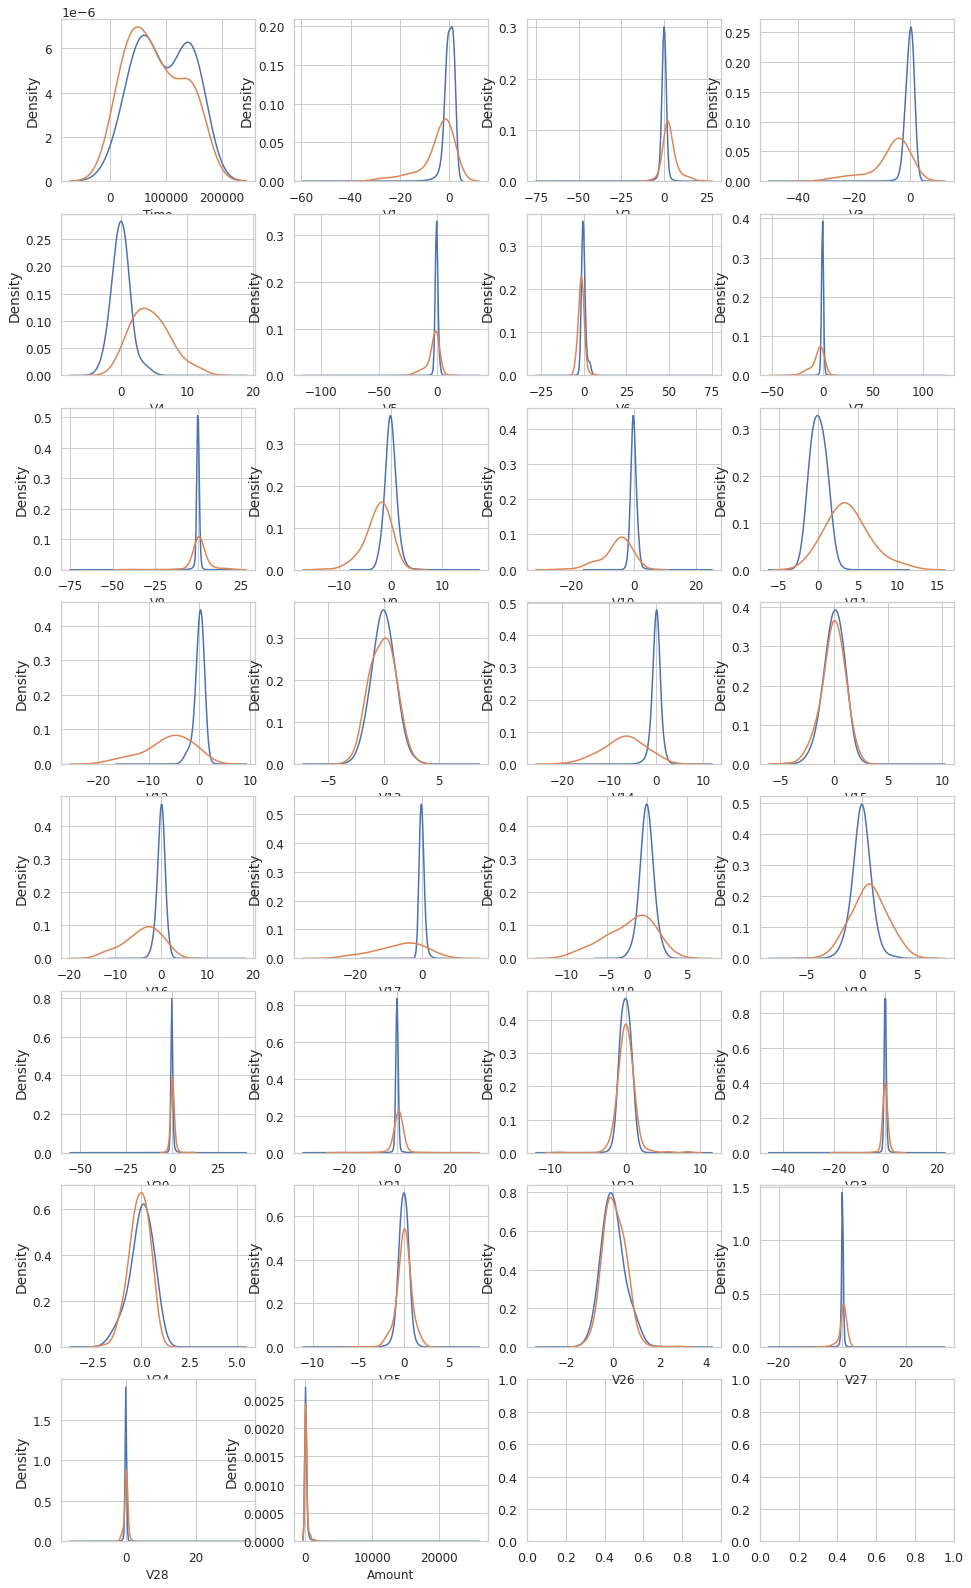

In [34]:
var = df.columns.values

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var[0:-1]:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

 > For some of the features we can observe a good selectivity in terms of distribution for the two values of `Class`:
 *  `V4, V11` have clearly separated distributions for `Class` values `0` & `1`.
 * `V12, V14, V18` are partially separated.
 *  `V1, V2, V3, V10` have a quite distinct profile.
 * `V25, V26, V28` have similar profiles for the two values of `Class`.
 * With a few exceptions in `Time` and `Amount`, the features distribution for non-fruadent transactions (values of `Class` equal `0`) is centered around `Zero`.
 * In the same time, the fraudulent transactions (values of `Class` equal `1`) have a skewed (asymmetric) distribution.

**Data Distribution Conclusion**

* the is no point from further exploration and analysis for the target and feature relationships without balancing our dataset with feature engieering.
* Also, before deciding out classifier, it's robustness or not depend on the skewness. Risking is ***Overfit*** the dominating class while neglecting all other minor classes which are low in amount.
* The minority class could act as an outlier for the statistical model in imbalanced datasets.
* Outliers adversely affect a model’s performance.
* Ignoring ***Imbalance or Outliers*** it will lead to poor performance in the minority fraud class, which are our most important result. 
> ***Approach:*** 
> * Balance the data.
    1. Undersampling the majority class.
      - the assumption is that some records of the majority class are redundant, however, the limit of this methodology is that by removing data we could remove relevant information.
    2. Oversampling the minority class by creating a synthetic sample.
      - this startegy aim to create synthetics examples of the minority class till the distribution of the data among the classes is the same. This can balance the class distribution but does not provide any additional information to the model in which it could risk an overfitting to the minority class.
    3. Hybrid way could be applying both methods: over and undersampling.
      - this startegy is to do it is by removing random records of the majority class and duplicating random examples of the minority class.
 * Process of skewness. 


## Feature Engineering

> Note: sampling doesn't introduce new information in the dataset, it (hopefully) merely shifts it around so as to increase the "numerical stability" of the resulting models.